In [400]:
import pandas as pd
#data = pd.read_csv('Meteorite_Landings.csv').dropna()
data = 'Meteorite_Landings.csv'
data = pd.read_csv(data)
df = data
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [401]:
#FIXOPTIMIZING BAD DATA 
max_value = df.reclong.max()
# Subtract 360 from the maximum value
new_value = max_value - 360

# Replace the maximum value with the new maximum value in the DataFrame
df.loc[df['reclong'] == max_value, 'reclong'] = new_value
new_value

-5.526670000000024

In [402]:
df.reclong.max()

178.2

In [403]:
data.drop(df[df['year'] < 1700].index, inplace=True)
data.year.min()

1704.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45694 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45694 non-null  object 
 1   id           45694 non-null  int64  
 2   nametype     45694 non-null  object 
 3   recclass     45694 non-null  object 
 4   mass (g)     45570 non-null  float64
 5   fall         45694 non-null  object 
 6   year         45403 non-null  float64
 7   reclat       38379 non-null  float64
 8   reclong      38379 non-null  float64
 9   GeoLocation  38379 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


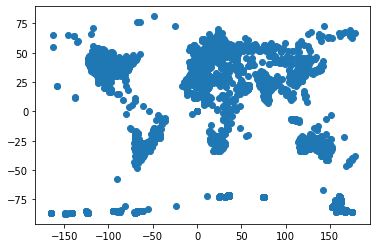

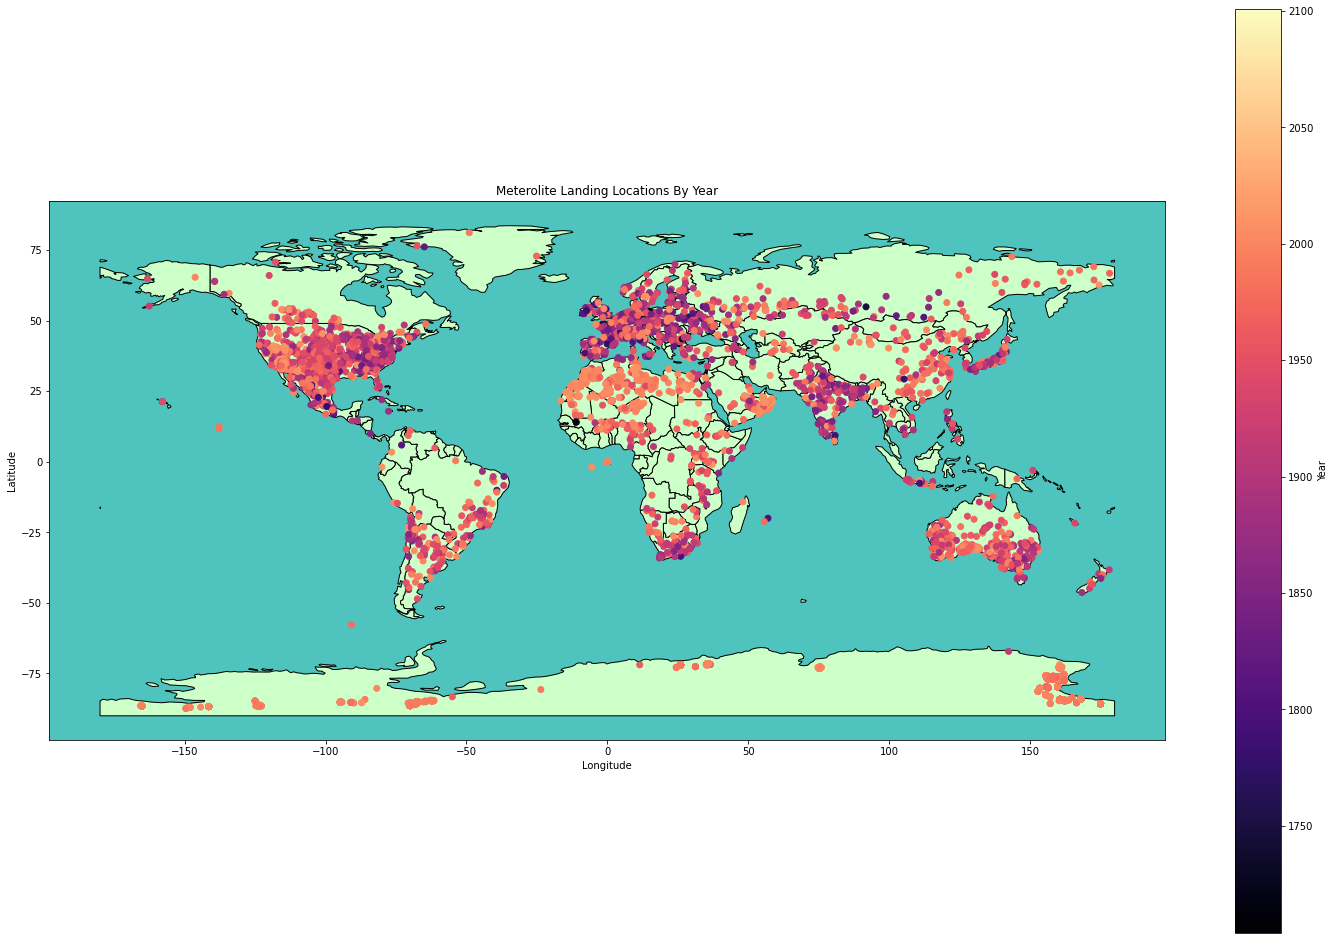

In [404]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
data.info()
box = data[['reclat', 'reclong']].dropna()
plt.scatter(box.reclong, box.reclat)


df = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['reclong'], data['reclat']))

# Plot the points on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(25, 17))
ax = world.plot(color='#CDFFC8', edgecolor='black', ax=ax)

#Gives Color to Background Water
ax.set_facecolor('#4FC4BE')




plt.scatter(data['reclong'], data['reclat'], c= data['year'],  cmap='magma' )

# Add a color bar with the year values
cbar = plt.colorbar()
cbar.set_label('Year')


plt.title('Meterolite Landing Locations By Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



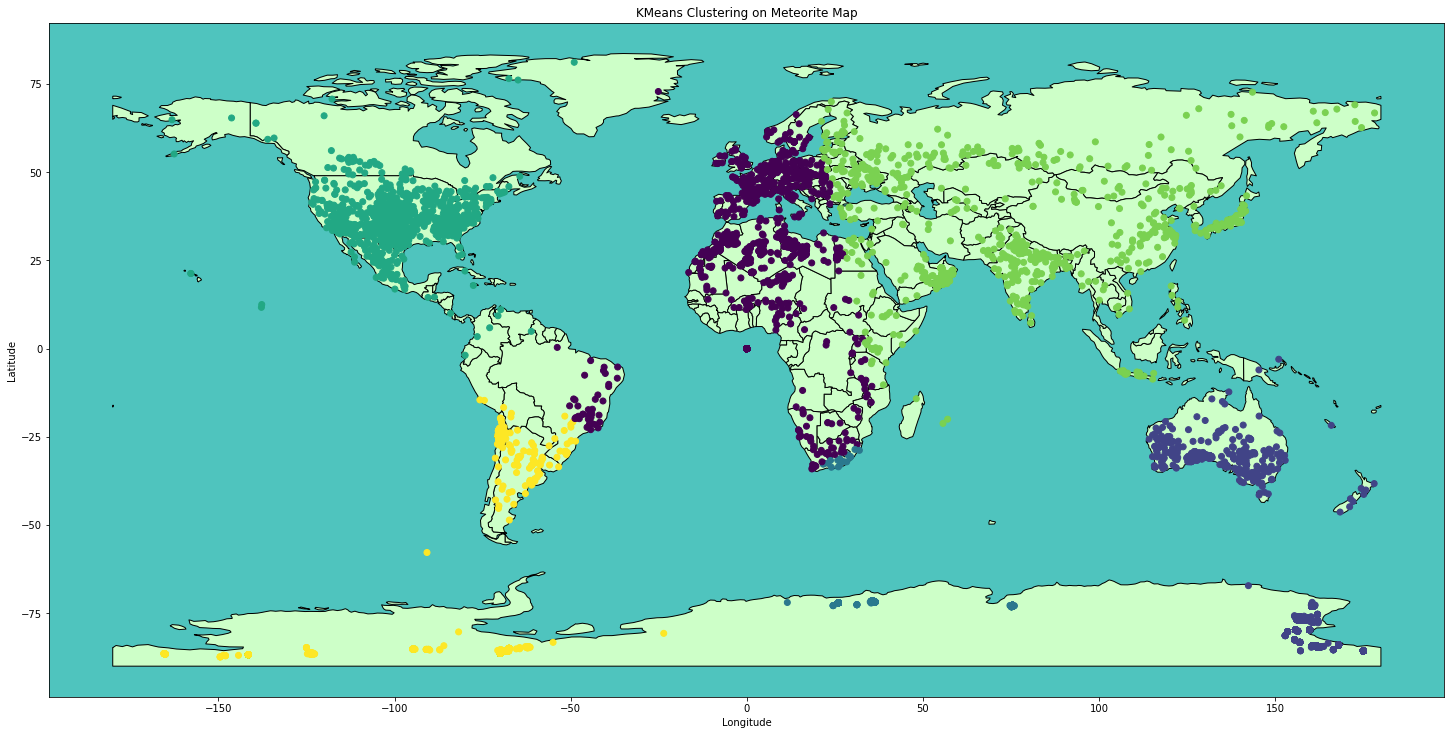

In [483]:

# Create a GeoDataFrame from the pandas DataFrame using the latitude and longitude columns
gdf = df
gdf = gdf[['reclong', 'reclat']].dropna()
# Fit the KMeans model
kmeans = KMeans(n_clusters=6, random_state=3)
kmeans.fit(gdf[['reclong', 'reclat']])

# Create a new column in the GeoDataFrame with the cluster labels
gdf['cluster_labels'] = kmeans.labels_

# Plot the scatter plot on the GeoPandas map
fig, ax = plt.subplots(figsize=(25, 17))

#Gives Color to Background Water
ax.set_facecolor('#4FC4BE')

#Plots the World Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='#CDFFC8', edgecolor='black', ax=ax)



#Plots the Kmeans Clusters
#gdf.plot(ax=ax, column='cluster_labels', cmap='viridis', legend=True, markersize=20)
plt.scatter(gdf.reclong, gdf.reclat, c=kmeans.labels_, cmap='viridis')

plt.title('KMeans Clustering on Meteorite Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [484]:
gdf

,reclong,reclat,cluster_labels
0,6.08333,50.77500,0
1,10.23333,56.18333,0
2,-113.00000,54.21667,3
3,-99.90000,16.88333,3
4,-64.95000,-33.16667,5
...,...,...,...
45711,17.01850,29.03700,0
45712,8.96667,13.78333,0
45713,17.66667,49.25000,0
45714,41.50460,49.78917,4


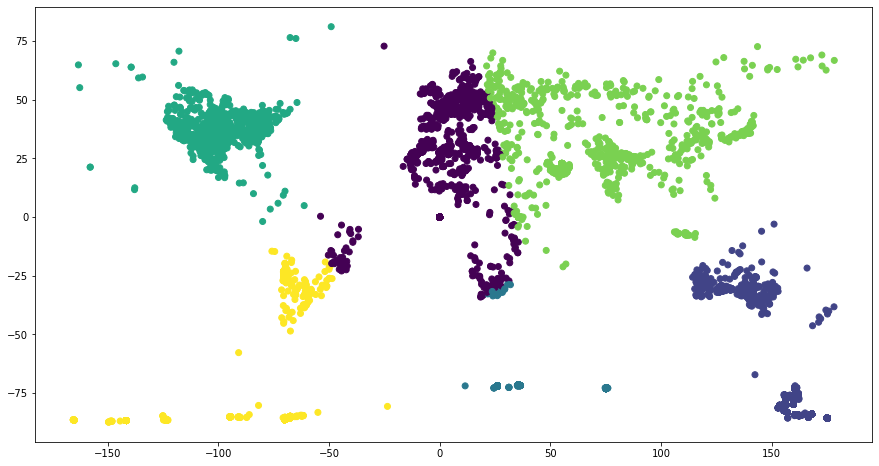

In [485]:
plt.figure(figsize = (15,8))
plt.scatter(gdf.reclong, gdf.reclat, c = gdf.cluster_labels)

In [486]:
df.year.max()

2101.0

In [487]:
freq_df = pd.DataFrame(df['year'].value_counts()).reset_index()

# rename the columns to 'year' and 'frequency'
freq_df = freq_df.rename(columns={'index': 'year', 'year': 'frequency'})

# sort the dataframe by 'year'
freq_df = freq_df.sort_values(by='year')

freq_df

,year,frequency
224,1715.0,1
216,1716.0,1
227,1723.0,1
217,1724.0,1
226,1740.0,1
...,...,...
14,2010.0,1005
20,2011.0,713
35,2012.0,234
124,2013.0,11


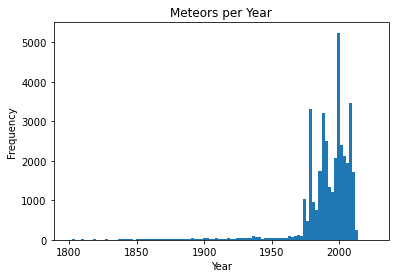

<Figure size 1440x1080 with 0 Axes>

In [488]:
plt.hist(df['year'], range=(1800, 2025), bins=100)
plt.title('Meteors per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.figure(figsize=(20, 15))
plt.show()

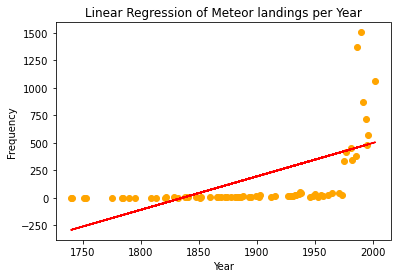

Accuracy: 0.22514814754059465


In [489]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# create a sample dataset

# split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(freq_df['year'], freq_df['frequency'], test_size=0.3, random_state=0)

# perform linear regression on the training data
regressor = LinearRegression()
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
regressor.fit(X_train, y_train)

# make predictions on the testing data
X_test = X_test.values.reshape(-1, 1)
y_pred = regressor.predict(X_test)

# plot the linear regression line and the testing data
plt.scatter(X_test, y_test, color='orange')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Linear Regression of Meteor landings per Year')
plt.show()

# calculate the accuracy of the model on the testing data
accuracy = regressor.score(X_test, y_test)
print('Accuracy:', accuracy)


In [490]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = df[['year', 'mass (g)', 'reclat', 'reclong', 'nametype']]
df = df.dropna()
df['found'] = (df['nametype'] == 'Valid').astype(int)

# select the features to use in the model
features = ['year', 'mass (g)', 'reclat', 'reclong']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['found'], test_size=0.3, random_state=42)

# create and fit a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9996500437445319


/Users/saleem/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

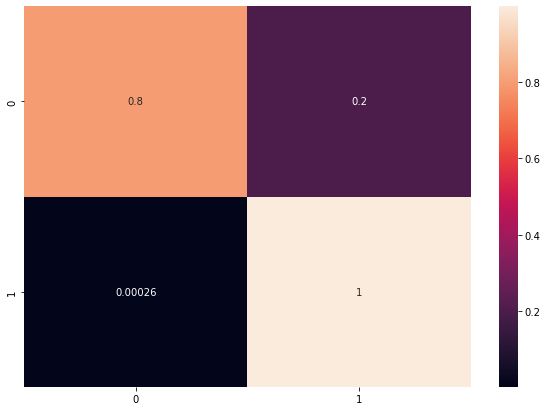

In [491]:
trainX = np.array(X_train)
testX = np.array(X_test)
trainy = np.array(y_train)
testy = np.array(y_test)
#Visualize performance by Normalized confusion matrix
import seaborn as sn
numClasses = 2

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(testX)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
 
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [492]:
df = data.dropna()
#NA geographics
north_america_lat_range = (10, 85)
north_america_lon_range = (-170, -60)

# Create a new column indicating whether the location is in North America or not
df['north_america'] = df.apply(lambda row: 1 if (north_america_lat_range[0] <= row['reclat'] <= north_america_lat_range[1]) and (north_america_lon_range[0] <= row['reclong'] <= north_america_lon_range[1]) else 0, axis=1)

# Split the data into training and testing sets
X = df[['year', 'mass (g)']] # input variables
y = df['north_america'] # binary outcome variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Fit a logistic regression
na_model = LogisticRegression(random_state=42)
na_model.fit(X_train, y_train)

y_pred = na_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9567804024496938


/var/folders/97/ykvdbw2s2nqcbkgxv0b4xfww0000gn/T/ipykernel_46745/3480520031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['north_america'] = df.apply(lambda row: 1 if (north_america_lat_range[0] <= row['reclat'] <= north_america_lat_range[1]) and (north_america_lon_range[0] <= row['reclong'] <= north_america_lon_range[1]) else 0, axis=1)


/Users/saleem/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

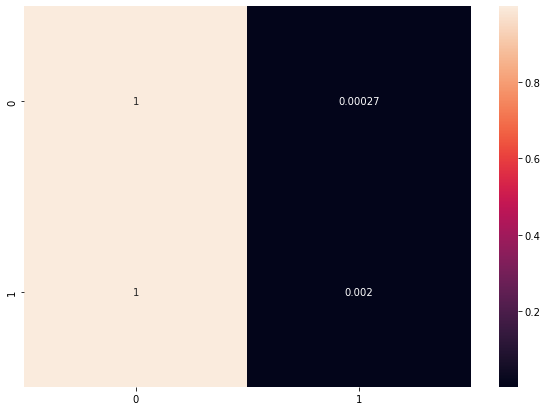

In [493]:
trainX = np.array(X_train)
testX = np.array(X_test)
trainy = np.array(y_train)
testy = np.array(y_test)
#Visualize performance by Normalized confusion matrix
import seaborn as sn
numClasses = 2

conf = np.zeros([numClasses,numClasses])
guesses = na_model.predict(testX)

for digit in range(len(testy)):
    real = testy[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
 
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [494]:
logist = 0
cluster = 0
for num in df['north_america']:
    logist += str(num).count('1')
for num in gdf['cluster_labels']:
    cluster += str(num).count('3')
    
print(f'''Based on the given coordinates for North America, Logistic Regression  produced an estimate of {logist} Meteor Landings in North America. 

Based on Kmeans 6 Clusters, North Americas Cluster is Estimated to Have {cluster} Meteor Landings''')



Based on the given coordinates for North America, Logistic Regression  produced an estimate of 1812 Meteor Landings in North America. 

Based on Kmeans 5 Clusters, North Americas Cluster is Estimated to Have 1818 Meteor Landings
